Using AUTOGLUON for Insurance dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install -U ipykernel # To make autogluon work in colab

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.5/821.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 22.0 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 121.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 150.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 124.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.5/136.5 kB 248.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 226.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 205.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requir

In [3]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [4]:
insurance_df = pd.read_csv('insurance.csv')

In [5]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Performing data visualization

<Axes: >

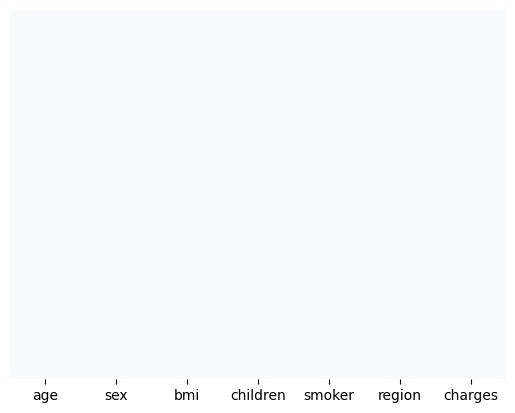

In [9]:
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [10]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

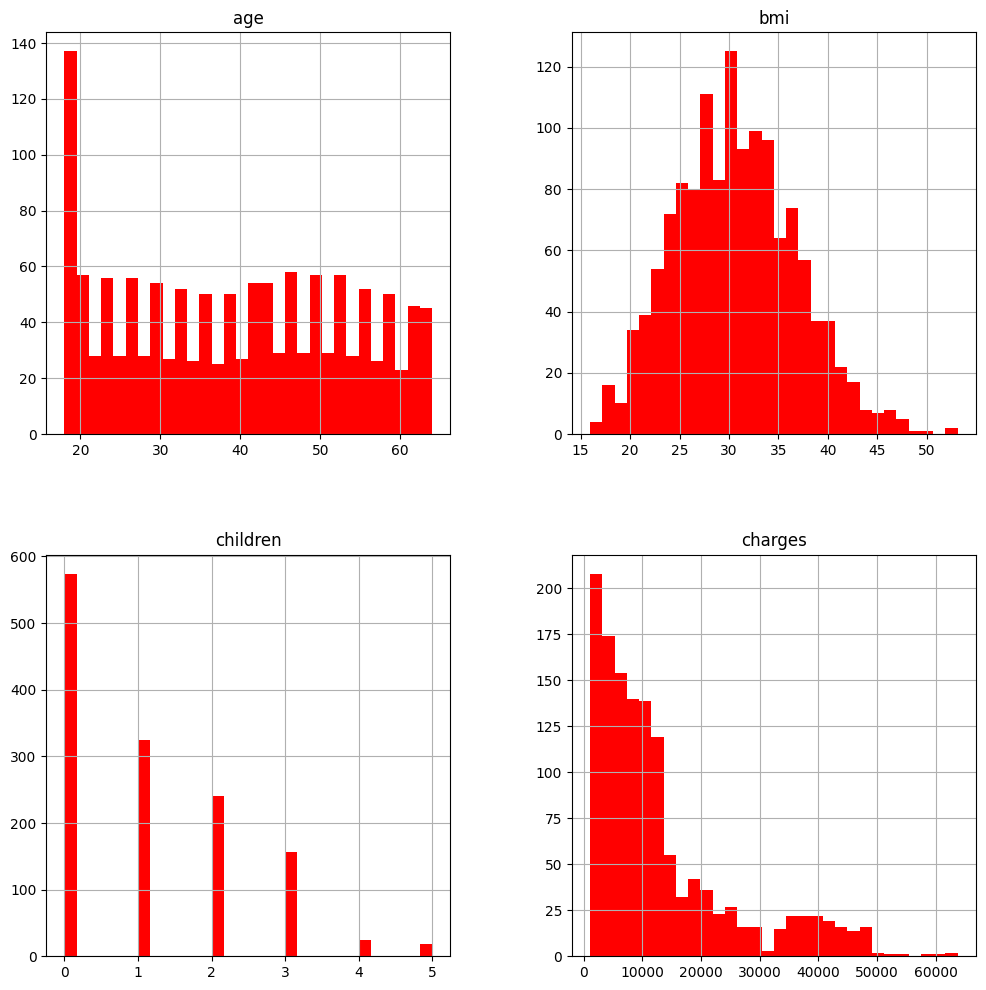

In [11]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (12, 12), color = 'r');

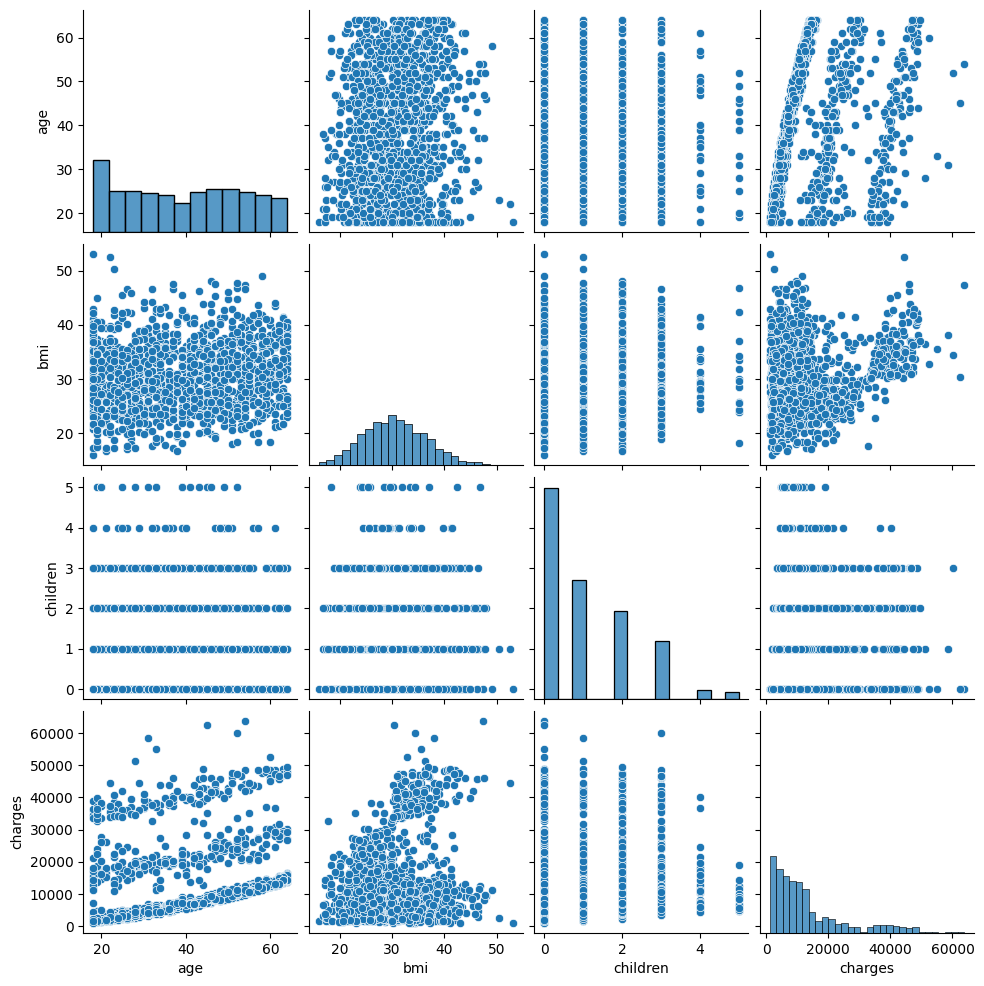

In [12]:
sns.pairplot(insurance_df)

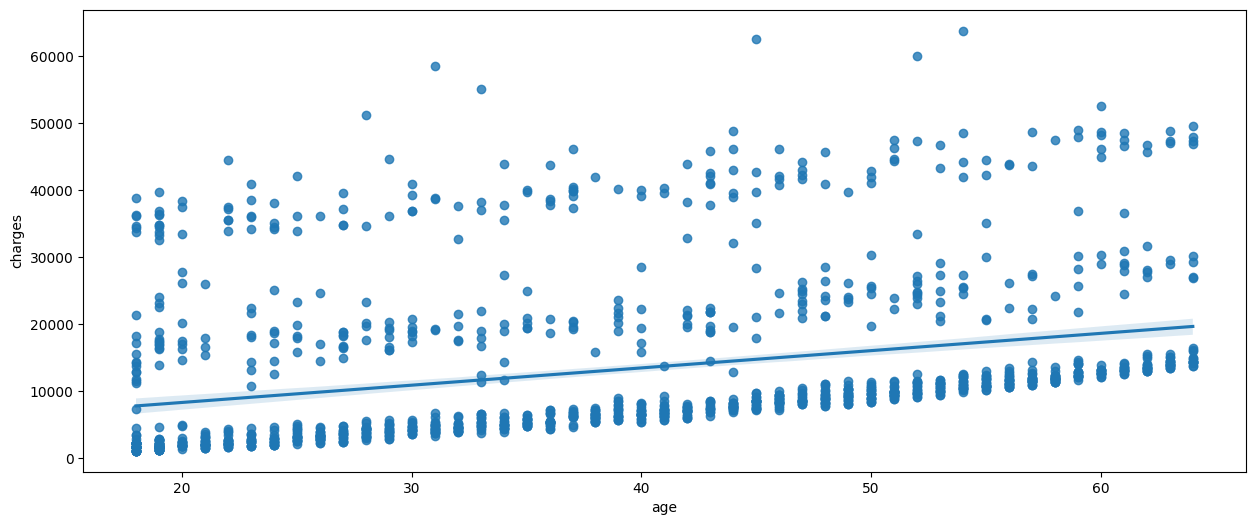

In [13]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()


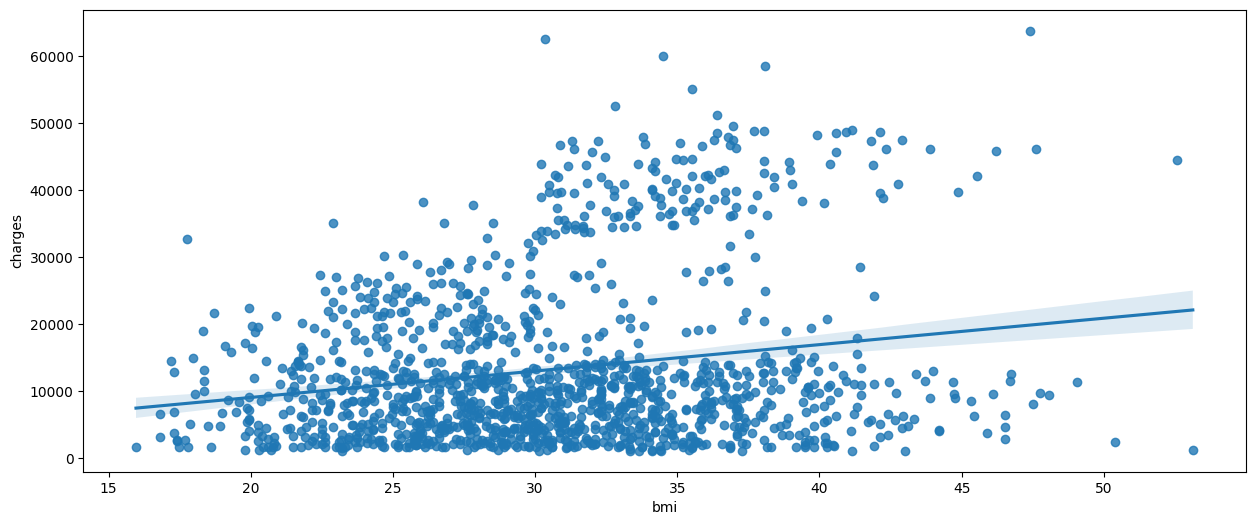

In [14]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()


### Training multiple models using autogluon

In [15]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(insurance_df, test_size=0.2, random_state=0)

In [16]:
predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'r2').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20240405_161236"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 200 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240405_161236/ds_sub_fit/sub_fit_ho.
Beginning AutoGluon training ... Time limit = 50s
AutoGluon will save models to "AutogluonModels/ag-20240405_161236/ds_sub_fit/sub_fit_ho"
=================== System Info ===================
AutoGluon Version:  1.0.

In [17]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3   0.847754          r2       0.540075  110.873243                0.000904           0.677541            3       True          9
1     WeightedEnsemble_L2   0.847428          r2       0.391640   81.780963                0.001264           0.659834            2       True          7
2         CatBoost_BAG_L1   0.846672          r2       0.028923   22.952576                0.028923          22.952576            1       True          6
3       LightGBMXT_BAG_L2   0.842501          r2       0.539171  110.195703                0.112203          29.058809            2       True          8
4       LightGBMXT_BAG_L1   0.840820          r2       0.066246   28.762738                0.066246          28.762738            1       True          3
5         Ligh

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -0.07448567993942246,
  'KNeighborsDist_BAG_L1': -0.16102308298670942,
  'LightGBMXT_BAG_L1': 0.8408198040276409,
  'LightGBM_BAG_L1': 0.8396145120831351,
  'RandomForestMSE_BAG_L1': 0.8227276280725969,
  'CatBoost_BAG_L1': 0.8466715382588097,
  'WeightedEnsemble_L2': 0.8474281439722828,
  'LightGBMXT_BAG_L2': 0.8425011228765336,
  'WeightedEnsemble_L3': 0.8477535203263222},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': ['KNeigh

In [24]:
y_predict = predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:5])

Predictions:   [11517.544921875, 10230.009765625, 45177.55859375, 13839.763671875, 10880.837890625]


In [18]:
predictor.evaluate(X_test)

{'r2': 0.9039664038558726,
 'root_mean_squared_error': -3909.197172831427,
 'mean_squared_error': -15281822.53607322,
 'mean_absolute_error': -2390.475683394415,
 'pearsonr': 0.9515898279848893,
 'median_absolute_error': -1592.5586041015629}

In [20]:
y_test = X_test['charges']

In [25]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 3909.197 
MSE = 15281822.53607322 
MAE = 2390.475683394415 
R2 = 0.9039664038558726
